In [ ]:
import zipfile
import os


file_path = '/content/human+activity+recognition+using+smartphones.zip'  # replace with actual path

if zipfile.is_zipfile(file_path):
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall('destination_path')
else:
    print("The file is not a valid zip archive.")


The file is not a valid zip archive.


In [ ]:
import pandas as pd

# Load feature names
feature_names = pd.read_csv(f"{extract_path}/UCI HAR Dataset/features.txt", sep="\s+", header=None, usecols=[1]).squeeze().tolist()

# Ensure unique column names
unique_feature_names = []
seen = set()
for name in feature_names:
    if name in seen:
        count = 1
        new_name = f"{name}_{count}"
        while new_name in seen:
            count += 1
            new_name = f"{name}_{count}"
        unique_feature_names.append(new_name)
        seen.add(new_name)
    else:
        unique_feature_names.append(name)
        seen.add(name)

# Load training and testing data
X_train = pd.read_csv(f"{extract_path}/UCI HAR Dataset/train/X_train.txt", sep="\s+", header=None, names=unique_feature_names)
y_train = pd.read_csv(f"{extract_path}/UCI HAR Dataset/train/y_train.txt", sep="\s+", header=None, names=["Activity"])

X_test = pd.read_csv(f"{extract_path}/UCI HAR Dataset/test/X_test.txt", sep="\s+", header=None, names=unique_feature_names)
y_test = pd.read_csv(f"{extract_path}/UCI HAR Dataset/test/y_test.txt", sep="\s+", header=None, names=["Activity"])

print("Dataset loaded successfully!")

Dataset loaded successfully!


In [ ]:
# Display first few rows of X_train
print("First few rows of X_train:")
print(X_train.head())


First few rows of X_train:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc

In [ ]:
# Display first few rows of y_train
print("\nFirst few rows of y_train:")
print(y_train.head())


First few rows of y_train:
   Activity
0         5
1         5
2         5
3         5
4         5


In [ ]:
# Display shape of the dataset
print("\nX_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (7352, 561)
y_train shape: (7352, 1)
X_test shape: (2947, 561)
y_test shape: (2947, 1)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying PCA (keeping 95% variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Converting to DataFrame
X_train_pca_df = pd.DataFrame(X_train_pca)
X_test_pca_df = pd.DataFrame(X_test_pca)

In [ ]:
# Display dataset before PCA
print("Original X_train (First 5 rows):")
print(pd.DataFrame(X_train).head())

Original X_train (First 5 rows):
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tB

In [ ]:
# Display dataset after PCA
print("\nX_train after PCA (First 5 rows):")
print(X_train_pca_df.head())


X_train after PCA (First 5 rows):
         0         1         2         3         4         5         6    \
0 -16.138544  2.152024 -3.144780  0.272464 -6.798938 -4.249394  2.937159   
1 -15.296194  1.387144  0.682221 -2.813677 -4.266170 -2.055663  0.011205   
2 -15.137019  2.473351  1.756641 -3.717974 -4.181557 -1.357518  0.072947   
3 -15.350884  3.915681  1.790322 -2.567521 -3.205840 -0.942944  0.530736   
4 -15.544814  4.598737  2.188582 -2.897578 -3.080150 -1.061458 -1.048591   

        7         8         9    ...       92        93        94        95   \
0 -4.905413  0.775515  3.627737  ...  1.835069 -0.165438 -1.318898  0.161542   
1 -1.845985 -0.492546  0.180175  ... -0.982101 -0.446051 -0.683640  0.624820   
2 -1.388188 -0.539754  0.671712  ...  0.961786  0.194423  0.488807  0.138448   
3 -1.832185 -1.071517  1.496989  ... -1.320354 -0.160942  0.416531  1.293980   
4 -0.816933 -0.600063 -1.118875  ... -0.591161 -0.218499  0.036210 -0.181110   

        96        97       

In [ ]:
# Comparing Shape
print("\nOriginal X_train shape:", X_train.shape)
print("Reduced X_train shape after PCA:", X_train_pca.shape)


Original X_train shape: (7352, 561)
Reduced X_train shape after PCA: (7352, 102)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(X_train_pca, y_train.values.ravel())

y_pred = clf.predict(X_test_pca)
print("Classification Accuracy (SVM with PCA):", accuracy_score(y_test, y_pred))

Classification Accuracy (SVM with PCA): 0.9222938581608415


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC

# Train the SVM Classifier
clf = SVC(kernel='linear')  # Linear SVM
clf.fit(X_train_pca, y_train.values.ravel())

# Predict on test data
y_pred = clf.predict(X_test_pca)

# Compute Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print(f"Classification Accuracy (SVM with PCA): {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Classification Accuracy (SVM with PCA): 0.9223
Precision: 0.9225
Recall: 0.9223
F1 Score: 0.9221

Confusion Matrix:
[[479   4  13   0   0   0]
 [ 31 413  27   0   0   0]
 [  7  40 373   0   0   0]
 [  0   1   0 424  66   0]
 [  0   0   0  39 493   0]
 [  0   0   0   0   1 536]]

Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.97      0.95       496
           2       0.90      0.88      0.89       471
           3       0.90      0.89      0.90       420
           4       0.92      0.86      0.89       491
           5       0.88      0.93      0.90       532
           6       1.00      1.00      1.00       537

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947



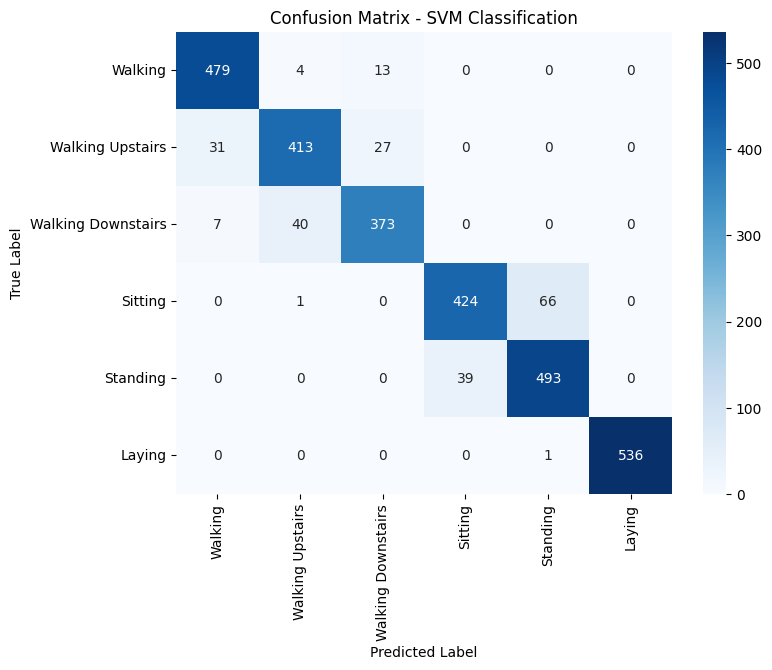

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define activity labels
labels = ["Walking", "Walking Upstairs", "Walking Downstairs", "Sitting", "Standing", "Laying"]

# Create heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM Classification")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Use one of the acceleration features as the target
target_feature = "tBodyAcc-mean()-X"  # Example feature

y_reg_train = X_train[target_feature]
y_reg_test = X_test[target_feature]

X_train_reg = X_train.drop(columns=[target_feature])
X_test_reg = X_test.drop(columns=[target_feature])

regressor = LinearRegression()
regressor.fit(X_train_reg, y_reg_train)

y_reg_pred = regressor.predict(X_test_reg)
print("Regression MAE (Linear Regression on Acceleration Feature):", mean_absolute_error(y_reg_test, y_reg_pred))

Regression MAE (Linear Regression on Acceleration Feature): 0.02372692633370998


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Compute MAE
mae = mean_absolute_error(y_reg_test, y_reg_pred)

# Compute R² Score
r2 = r2_score(y_reg_test, y_reg_pred)

# Display results
print("Regression MAE (Linear Regression on Acceleration Feature):", mae)
print("Regression R² Score (Linear Regression on Acceleration Feature):", r2)

Regression MAE (Linear Regression on Acceleration Feature): 0.02372692633370998
Regression R² Score (Linear Regression on Acceleration Feature): 0.7034015340532931


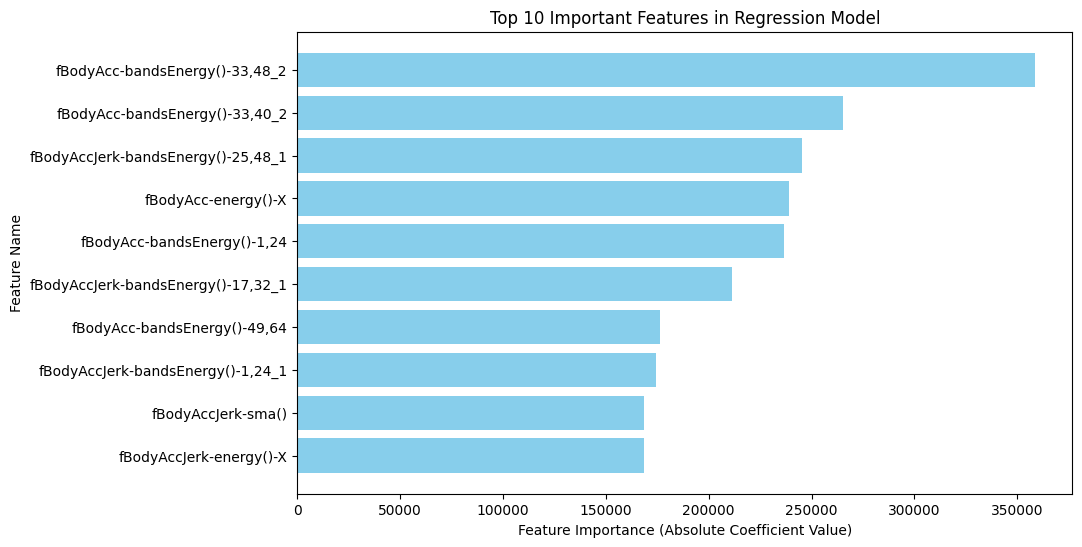

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance
feature_importance = np.abs(regressor.coef_)
feature_names = X_train_reg.columns

# Sort in descending order
sorted_indices = np.argsort(feature_importance)[::-1]

# Plot top 10 features
plt.figure(figsize=(10, 6))
plt.barh([feature_names[i] for i in sorted_indices[:10]], feature_importance[sorted_indices[:10]], color='skyblue')
plt.xlabel("Feature Importance (Absolute Coefficient Value)")
plt.ylabel("Feature Name")
plt.title("Top 10 Important Features in Regression Model")
plt.gca().invert_yaxis()
plt.show()

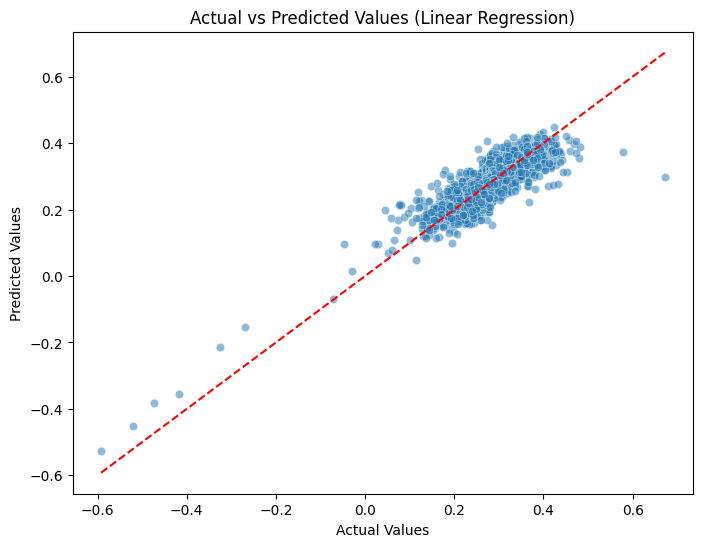

In [ ]:
import seaborn as sns

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_reg_test, y=y_reg_pred, alpha=0.5)
plt.plot([min(y_reg_test), max(y_reg_test)], [min(y_reg_test), max(y_reg_test)], color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.show()

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV

# Ridge Regression with Cross-Validation
ridge = RidgeCV(alphas=np.logspace(-3, 3, 10), cv=5)
ridge.fit(X_train_reg, y_reg_train)
ridge_best_alpha = ridge.alpha_

# Lasso Regression with Cross-Validation
lasso = LassoCV(alphas=np.logspace(-3, 3, 10), cv=5)
lasso.fit(X_train_reg, y_reg_train)
lasso_best_alpha = lasso.alpha_

print(f"Best Alpha for Ridge: {ridge_best_alpha}")
print(f"Best Alpha for Lasso: {lasso_best_alpha}")

Best Alpha for Ridge: 10.0
Best Alpha for Lasso: 0.001


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV
import numpy as np

# Standardize the training data
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

# Updated alpha range for better tuning
ridge_alphas = np.logspace(-4, 4, 20)
lasso_alphas = np.logspace(-2, 2, 15)  # Avoid very small alphas

# Ridge Regression with Cross-Validation
ridge = RidgeCV(alphas=ridge_alphas, cv=5)
ridge.fit(X_train_reg_scaled, y_reg_train)
ridge_best_alpha = ridge.alpha_

# Lasso Regression with Cross-Validation and increased iterations
lasso = LassoCV(alphas=lasso_alphas, cv=5, max_iter=5000)
lasso.fit(X_train_reg_scaled, y_reg_train)
lasso_best_alpha = lasso.alpha_

print(f"Optimized Alpha for Ridge: {ridge_best_alpha}")
print(f"Optimized Alpha for Lasso: {lasso_best_alpha}")


Optimized Alpha for Ridge: 78.47599703514607
Optimized Alpha for Lasso: 0.01


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict on test data
y_ridge_pred = ridge.predict(X_test_reg_scaled)
y_lasso_pred = lasso.predict(X_test_reg_scaled)

# Compute metrics
ridge_mae = mean_absolute_error(y_reg_test, y_ridge_pred)
ridge_r2 = r2_score(y_reg_test, y_ridge_pred)

lasso_mae = mean_absolute_error(y_reg_test, y_lasso_pred)
lasso_r2 = r2_score(y_reg_test, y_lasso_pred)

print(f"Ridge Regression MAE: {ridge_mae}, R² Score: {ridge_r2}")
print(f"Lasso Regression MAE: {lasso_mae}, R² Score: {lasso_r2}")


Ridge Regression MAE: 0.023278164623238215, R² Score: 0.7071667903898098
Lasso Regression MAE: 0.022954927472007242, R² Score: 0.5252452507818132


In [ ]:
selected_features = X_train_reg.columns[lasso.coef_ != 0]
print(f"Features selected by Lasso: {selected_features.tolist()}")


Features selected by Lasso: ['tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-entropy()-X', 'tGravityAcc-iqr()-X', 'angle(tBodyAccMean,gravity)']


In [ ]:
print(X_train.columns)


Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)


In [ ]:
for col in X_train.columns:
    print(col)


tBodyAcc-mean()-X
tBodyAcc-mean()-Y
tBodyAcc-mean()-Z
tBodyAcc-std()-X
tBodyAcc-std()-Y
tBodyAcc-std()-Z
tBodyAcc-mad()-X
tBodyAcc-mad()-Y
tBodyAcc-mad()-Z
tBodyAcc-max()-X
tBodyAcc-max()-Y
tBodyAcc-max()-Z
tBodyAcc-min()-X
tBodyAcc-min()-Y
tBodyAcc-min()-Z
tBodyAcc-sma()
tBodyAcc-energy()-X
tBodyAcc-energy()-Y
tBodyAcc-energy()-Z
tBodyAcc-iqr()-X
tBodyAcc-iqr()-Y
tBodyAcc-iqr()-Z
tBodyAcc-entropy()-X
tBodyAcc-entropy()-Y
tBodyAcc-entropy()-Z
tBodyAcc-arCoeff()-X,1
tBodyAcc-arCoeff()-X,2
tBodyAcc-arCoeff()-X,3
tBodyAcc-arCoeff()-X,4
tBodyAcc-arCoeff()-Y,1
tBodyAcc-arCoeff()-Y,2
tBodyAcc-arCoeff()-Y,3
tBodyAcc-arCoeff()-Y,4
tBodyAcc-arCoeff()-Z,1
tBodyAcc-arCoeff()-Z,2
tBodyAcc-arCoeff()-Z,3
tBodyAcc-arCoeff()-Z,4
tBodyAcc-correlation()-X,Y
tBodyAcc-correlation()-X,Z
tBodyAcc-correlation()-Y,Z
tGravityAcc-mean()-X
tGravityAcc-mean()-Y
tGravityAcc-mean()-Z
tGravityAcc-std()-X
tGravityAcc-std()-Y
tGravityAcc-std()-Z
tGravityAcc-mad()-X
tGravityAcc-mad()-Y
tGravityAcc-mad()-Z
tGravityAcc-m